In [ ]:
import pandas as pd 

seeds = [42, 100, 3215, 21]

dfs = []
for seed in seeds:
    df1 = pd.read_csv(f"./dataset/stitching/testing/figures/reuse/results_{seed}.csv")
    df2 = pd.read_csv(f"./dataset/stitching/testing/figures/recompute_all/results_{seed}.csv")
    df3 = pd.read_csv(f"./dataset/stitching/testing/figures/recompute_ds/results_{seed}.csv")
    df4 = pd.read_csv(f"./dataset/stitching/testing/figures/all_paths_all/results_{seed}.csv")
    df5 = pd.read_csv(f"./dataset/stitching/testing/figures/all_paths_ds/results_{seed}.csv")
    df6 = pd.read_csv(f"./dataset/stitching/testing/figures/all_paths_reuse/results_{seed}.csv")
    
    dfs.append(df1)
    dfs.append(df2)
    dfs.append(df3)
    dfs.append(df4)
    dfs.append(df5)
    dfs.append(df6)

df = pd.concat(dfs)
df['ds_method'] = df['ds_method'].replace({
    'reuse': 'Reuse Gauss + P',
    'recompute_all': 'Recompute All', 
    'recompute_ds': 'Reuse Gauss',
    'all_paths_all': 'Recompute All*',
    'all_paths_ds': 'Reuse Gauss*',
    'all_paths_reuse': 'Reuse Gauss + P*'
})

df['ds_method'] = pd.Categorical(df['ds_method'], 
                                categories=['Recompute All', 'Reuse Gauss', 'Reuse Gauss + P', 'Recompute All*', 'Reuse Gauss*', 'Reuse Gauss + P*'], 
                                ordered=True)

In [59]:
df.head()


,combination_id,ds_method,gg compute time,ds compute time,total compute time,initial_x,initial_y,attractor_x,attractor_y,prediction_rmse,cosine_dissimilarity,dtw_distance_mean,dtw_distance_std,distance_to_attractor_mean,distance_to_attractor_std,trajectory_length_mean,trajectory_length_std,n_simulations
0,0,Reuse Gauss + P,0.062014,2.882717,2.944731,8.836694,7.780032,4.258065,12.938312,0.108128,0.140068,7355.053874,208.318510,0.009999,2.758886e-07,10632.0,950.0,2
1,1,Reuse Gauss + P,0.059739,1.565121,1.624861,8.836694,7.780032,2.199597,2.587256,0.046746,0.033190,4363.033042,43.045276,0.009999,2.954512e-07,14823.0,124.0,2
2,2,Reuse Gauss + P,0.060634,0.030038,0.090673,8.836694,7.780032,11.469758,2.091112,0.288407,0.212329,603.413255,3.955423,0.009994,1.634801e-06,4139.0,28.0,2
3,3,Reuse Gauss + P,0.060246,1.950525,2.010772,8.836694,7.780032,4.051075,5.888799,0.062963,0.035727,3836.784755,6.144811,0.009998,4.071842e-07,21368.5,137.5,2
4,4,Reuse Gauss + P,0.059527,1.525564,1.585092,8.836694,7.780032,12.917339,12.440138,0.064953,0.125663,4212.458972,41.967143,0.009998,1.641329e-06,9508.0,83.0,2


In [60]:
nan_counts = df.groupby('ds_method')['prediction_rmse'].apply(lambda x: x.isna().sum())
print(nan_counts / len(df[df["ds_method"]=="Recompute All"]))

ds_method
Recompute All      0.133333
Reuse Gauss        0.000000
Reuse Gauss + P    0.000000
Name: prediction_rmse, dtype: float64


In [80]:
import latex_summary
import importlib
importlib.reload(latex_summary)
latex_summary.print_summary(df)

=== Statistical Summary by DS Method ===

\begin{table}[htbp]
\centering
\caption{Performance Comparison of DS Methods (Mean ± Standard Deviation)}
\label{tab:ds_method_comparison}
\begin{tabular}{lcccccc}
\hline
Method & Cosine Dissimilarity & Prediction RMSE & DTW Distance & Distance to Attractor & Trajectory Length & DS Compute Time \\
\hline
Recompute All & \textbf{0.11 ± 0.05} & \textbf{0.11 ± 0.08} & \textbf{4612.85 ± 4260.70} & \textbf{0.02 ± 0.03} & \textbf{14792.61 ± 7572.29} & 0.97 ± 0.51 \\
Reuse Gauss & 0.12 ± 0.07 & 0.11 ± 0.07 & 8401.83 ± 10258.47 & 0.03 ± 0.15 & 18052.94 ± 8254.38 & \textbf{0.04 ± 0.05} \\
Reuse Gauss + P & 0.14 ± 0.09 & 0.13 ± 0.08 & 7682.01 ± 8758.94 & 0.05 ± 0.16 & 15350.74 ± 7097.98 & 3.30 ± 1.92 \\
\hline
\end{tabular}
\note{Lower values indicate better performance for all metrics. Best values are shown in bold.}
\end{table}

=== End of LaTeX Summary ===


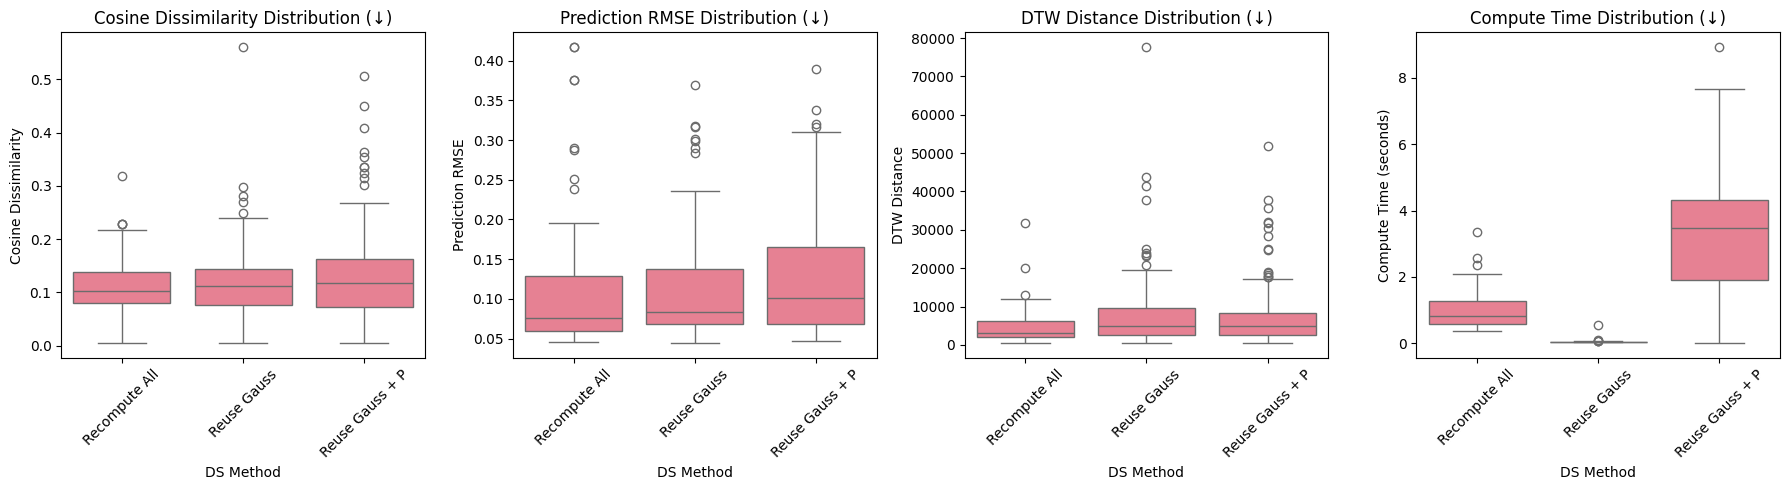

In [66]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
# fig.suptitle('Distribution Comparison Across DS Methods', fontsize=16, fontweight='bold')

# Cosine Dissimilarity box plot
sns.boxplot(data=df, x="ds_method", y="cosine_dissimilarity", ax=axes[0])
axes[0].set_title('Cosine Dissimilarity Distribution (↓)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xlabel('DS Method')
axes[0].set_ylabel('Cosine Dissimilarity')

# Prediction RMSE box plot
sns.boxplot(data=df, x="ds_method", y="prediction_rmse", ax=axes[1])
axes[1].set_title('Prediction RMSE Distribution (↓)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel('DS Method')
axes[1].set_ylabel('Prediction RMSE')

# DTW Distance box plot
sns.boxplot(data=df, x="ds_method", y="dtw_distance_mean", ax=axes[2])
axes[2].set_title('DTW Distance Distribution (↓)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_xlabel('DS Method')
axes[2].set_ylabel('DTW Distance')

# Compute Time box plot
if 'ds compute time' in df.columns:
    sns.boxplot(data=df, x="ds_method", y="ds compute time", ax=axes[3])
    axes[3].set_title('Compute Time Distribution (↓)')
    axes[3].tick_params(axis='x', rotation=45)
    axes[3].set_xlabel('DS Method')
    axes[3].set_ylabel('Compute Time (seconds)')

plt.tight_layout()
plt.savefig('figures/ds_method_comparison.png')
plt.show()